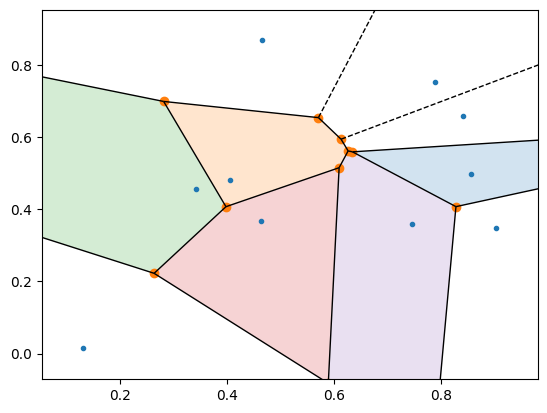

In [2]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

# Generate random points
points = np.random.rand(10, 2)

# Compute the Voronoi diagram
vor = Voronoi(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)

# Access the regions
for region in vor.regions:
    if not -1 in region:  # Exclude the outer region
        polygon = vor.vertices[region]
        plt.fill(*zip(*polygon), alpha=0.2)  # Fill the region

plt.show()


In [3]:
len(vor.regions)

11

In [4]:
vor.regions

[[3, 1, 0, -1, 2],
 [6, 4, 5],
 [-1, 0, 4, 6],
 [],
 [12, 10, 9, 7, 8, 11],
 [8, 3, 2, 7],
 [9, -1, 2, 7],
 [11, 1, 3, 8],
 [10, -1, 9],
 [12, 5, 6, -1, 10],
 [12, 5, 4, 0, 1, 11]]

In [5]:
vor.vertices

array([[ 0.77747053, -0.41782737],
       [ 0.58930562, -0.08242404],
       [-2.49844519,  1.53369352],
       [ 0.26365162,  0.22265475],
       [ 0.82796878,  0.40757803],
       [ 0.63450651,  0.55958849],
       [ 1.57108633,  0.64695412],
       [ 0.28150461,  0.69934678],
       [ 0.39796695,  0.40742337],
       [ 0.57087452,  0.65450285],
       [ 0.61319072,  0.59462781],
       [ 0.60956918,  0.51559099],
       [ 0.62642535,  0.56212906]])

In [6]:
vor.point_region

array([ 6,  0,  2,  5,  8,  9,  7,  1, 10,  4])